<h1>Language Models</h1>

<h1>Overview</h1>

This document aims to explain what a language model is and how we can build a simple one. You have likely heard or read news about Language Models, especially Large Language Models (or LLMs for short), frequently these days since the release of <b>ChatGPT</b>. 

<b>ChatGPT</b>, which is built on top of LLMs like GPT-4, has become a notable example in the field. In this notebook, I will show you how to construct a language model from scratch. As we proceed step by step, I'll also discuss some considerations and challenges associated with building and training such models, as well as how the experts in the field have addressed them.

<b>Should I build my own language model?</b>

Probably not! Building a language model, especially a large one, from scratch is often not practical for most individuals or even small teams. This is because training such models requires extensive computational resources and large, high-quality datasets. Instead, many people opt to use pre-trained models and fine-tune them for specific tasks. However, even fine-tuning can be computationally expensive and may not yield good results if your dataset is small due to the risk of overfitting.

<b>Why should I then bother to learn how language models are built? </b>

Understanding the mechanics of language models can empower you to use them more effectively. When you're implementing these models in real-world scenarios, having a solid foundational knowledge will help you troubleshoot issues, optimize performance, and make informed decisions about which model to use and how to adapt it for your specific needs.

<h3>What is a language model?</h3>

A language model is a probability distribution over a sequence of tokens drawn from a specific vocabulary. For example, if we consider the vocabulary to be the English language, then a sequence of tokens could be the sentence 'The sky is blue.'

<b>What does it mean when we say, 'A language model is a probability distribution,' and how can we utilize this concept?</b>

Mathematically speaking, considering the vocabulary $V$, for every sequence of tokens $x_1,...x_m$, where each token $x_i \in V $, a language model is defined by the probability distribution $p(x_1,x_2,...,x_m)$. In other words, $p(x_1,x_2,...,x_m)$ tells us how likely a sequence of tokens is to be observed. Of cource, we expect that this probability distribution assigns a high probability to correct sequences while giving small probability to incorrect or meaningless sequences. For example, we expect $p(.)$ to give a higher probability to 'The sky is blue' in comparison to 'A sky was the blue'

Now let's delve into some mathematics to see what we can drive from $p(.)$.

Using the chain rule of probability, we can rewrite $p(x_1,x_2,...,x_m)$ as follows:
$$p(x_{1:m})=p(x_1)p(x_2∣x_1)p(x_3∣x_1,x_2)⋯p(x_m∣x_{1:m−1})=\prod_{i=1}^m p(x_i∣x_1:i−1).$$
Here, each term in the multiplication represents the conditional probability of the current token given the previous tokens. 

Knowing the conditional probability $p(x_i∣x_{1:i−1})$ means that given the sequence $x_1,...,x_{i−1}$, we can sample the next token $x_i$ from the vocabulary, and then sample another one, and so on. Sampling the tokens one after another implies that we are <b><i>generating</i></b> a sequence of vocabularies or in other words, we are <b><i>generating</i></b> a text. 

<b>Now, one key question to ask is, 'Do we know this probability distribution?' if not, Can we estimate it </b>    
The answer to the first question is 'No! We do not.' The answer to the latter one is 'Yes! We can.' Here, Deep Neural Networks, especially Transformers, come to the rescue.


<b>Summary</b>
<ul>
  <li>A language model is a probability distribution over a sequence of tokens drawn from a specific vocabulary.</li>
  <li>Mathematically, this probability distribution is defined by $p(x_1,x_2,...,x_m) =\prod_{i=1}^m p(x_i∣x_1:i−1).$</li>
  <li>We do not know this probability distribution but we can estimate by building a special deep neural network.</li>
    <li>The model, which estimates the language model, can then be utilized to generate meaningful texts.</li>
</ul>

<h3>Analyzing Sequential Data Using Deep Neural Networks</h3>


<h3>Recurrent Neural Networks (RNNs)</h3>

NLP tasks, such as Language Modeling and Machine Translation, require analyzing data sequentially. Traditional feedforward neural networks are not capable of handling dependencies in sequential data, as they lack any memory of previous inputs. This is where RNNs (Recurrent Neural Networks), and later on, Transformers, come into the scene. Unlike traditional feedforward networks, RNNs are able to maintain a hidden state that acts as a form of memory, enabling them to capture information about previous inputs in the sequence.

This characteristic makes RNNs well-suited for various tasks. For example, they are ideal for text generation and machine translation. Due to their ability to model temporal dependencies, they can be used for forecasting stock prices, weather, and other time-dependent phenomena. The sequential nature of audio signals makes RNNs valuable for speech recognition tasks. Additionally, they can analyze sequences of video frames to recognize actions or gestures over time.

However, traditional RNNs suffered from problems like vanishing or exploding gradients, making them difficult to train on long sequences. This led to the development of more advanced types of RNNs, such as Long Short-Term Memory (LSTM) networks and Gated Recurrent Units (GRUs), which are designed to better capture long-range dependencies in sequential data. While LSTMs and GRUs are designed to capture long-range dependencies, they may still be challenged by the inherent sequential nature of their processing, limiting their parallelization efficiency and potentially affecting their ability to model extremely complex dependencies. In contrast, Transformers use a self-attention mechanism that allows them to directly model relationships between all parts of the input sequence, regardless of distance. This parallel processing enables more efficient training and can provide Transformers with a significant advantage in tasks requiring a nuanced understanding of context and long-range interactions between elements in a sequence.

<h3>Transformers</h3>

Transformers are a type of neural network architecture introduced by Vaswani et al. in the paper "<a href=https://arxiv.org/abs/1706.03762>Attention is All You Need</a>". As opposed to sequential models like RNNs, LSTMs, and GRUs, Transformers are able to process an entire sequence of data simultaneously rather than sequentially.
The core of the Transformer architecture is the attention mechanism, which allows the model to weigh the importance of different parts of the input (e.g. different tokens in a sequence of tokens) when processing each individual element (e.g., a token). This enables the Transformer to capture complex relationships and dependencies between all parts of the input, regardless of their distance from each other in the sequence.

A typical Transformer model consists of an encoder and a decoder, each composed of several layers of self-attention and feed-forward neural networks. The encoder processes the input sequence (e.g. an English sentence), and the decoder generates the output (e.g. the equivalent French translation of the input), with attention mechanisms at each layer allowing the model to focus on different parts of the input as needed

The parallel processing nature of the Transformer architecture makes it highly efficient for training on modern GPUs, and its flexibility and scalability have led to its adoption in a wide variety of natural language processing tasks, including machine translation, text generation, and language understanding. Transformers have served as the foundation for many state-of-the-art models, such as BERT and GPT series

In this post, I will not be delving further into the architecture of Transformers. Interested readers can refer to <a href='http://jalammar.github.io/illustrated-transformer/'>this post</a> by Jay Alammar, which provides an amazing explanation and illustration of Transformers.

<b>Summary</b>
<ul>
  <li>Traditional feedforward neural networks are not capable of handling dependencies in sequential data, as they lack any memory of previous inputs. 
  <li>RNNs are able to maintain a hidden state that acts as a form of memory, enabling them to capture information about previous inputs in the sequence.</li>
  <li>Traditional RNNs suffered from problems like vanishing or exploding gradients, making them difficult to train on long sequences. </li>
    <li>LSTMs and GRUs are more advanced types of RNNs which are designed to better capture long-range dependencies in sequential data. </li>
    <li>LSTMs and GRUs still suffer from the inherent sequential nature of their processing, which limits their parallelization efficiency and potentially affects their ability to model extremely complex dependencies. </li>
    <li>Transformers, as opposed to RNNs, LSTMs, and GRUs, are able to process an entire sequence of data in parallel rather than sequentially.</li>
    <li>The core of the Transformers is the attention mechanism which enables the Transformers to capture complex relationships and dependencies between all parts of the input, regardless of their distance from each other in the sequence.</li>
</ul>

<h3>Building and Training a Language Model </h3>


Now that we have learned what a language model is theoretically, it is time to gain some hands-on experience by implementing a real yet simple language model. 

Here is the roadmap:
<ul>
    <li>First, we will start by building a simple language model using RNNs. Although modern language models often use Transformers at their cores, I believe that exploring both approaches will be a valuable learning experience.
</li>
    <li>Second, I will alter the model to use Transformers instead. 
</li>
    <li>Third, I will further expand the model by introducing the concept of Mixture of Experts and Switch Transformers.  </li>
    <li>Lastly, using a publicly available dataset, I will demonstrate how to train the final model.</li>
</ul>


<h3>An RNN based Langauage Model</h3>

In [15]:
import torch.nn as nn

In [16]:
class LanguageModelRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size):
        super(LanguageModelRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        output, _ = self.rnn(embedded)
        # Use the entire sequence of outputs
        output = self.fc(output)
        return output

The above LanguageModelRNN class has a very simple architecture, consisting only one layer of LSTM and one fully connected layer. 
Please note that the output size is implicitly determined by the vocab_size parameter when setting up the final fully connected layer (self.fc). Since we're building a language model, the output dimension is naturally the size of the vocabulary. That is, for each token in the input sequence, the model predicts a distribution over the entire vocabulary for the next token. This is why the fully connected layer uses hidden_size as the input dimension and vocab_size as the output dimension.

<h3>An Transformer based Langauage Model</h3>

Earlier in this post, I discussed a few limitations of RNNs and how transformers address them. Additionally, State-of-the-art language models, such ascLLAMA and GPT models, mainly use transformers in their architectures. Thus, I will Replace the LSTM layer with a transformer encoder. The transformer encoder takes a sequence of embeddings and returns a sequence of encoded vectors.

In [20]:
from torch.nn import TransformerEncoder, TransformerEncoderLayer

In [24]:
class LanguageModelTransform(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_heads, num_layers):
        super(LanguageModelTransform, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Transformer layer
        encoder_layers = TransformerEncoderLayer(embedding_dim, num_heads, hidden_size)
        self.transformer_encoder = TransformerEncoder(encoder_layers, num_layers)

        self.fc = nn.Linear(embedding_dim, vocab_size)

    def forward(self, x):
        embedded = self.embedding(x)
        output = self.transformer_encoder(embedded) # Transform through the transformer encoder
        output = self.fc(output) # Final fully connected layer
        return output


Please note that, in reality, SOTA language models have billions of parameters. This is why they are often referred to as Large Language Models (LLMs). Training such models also requires tremendous computational power. I will discuss considerations for training these LLMs in a subsequent. However, in the following sections, I will demonstrate how to train our small-scale language model.

<h2>Training</h2>


<h3>Dataset and Preprocessing</h3>

In this article, we'll leverage a publicly available dataset to train our concise language model. There are several datasets available for such tasks, including Wikitext-103, Penn Treebank (PTB), Text8, and Gutenberg. For our purposes, we'll utilize the Penn Treebank (PTB) dataset, accessible via PyTorch's built-in datasets.

For NLP tasks, it's essential to break down input text into a series of tokens, a process known as tokenization. While there are various methods to achieve this, SentencePiece and Byte-Pair Encoding (BPE) stand out as advanced tokenization techniques adept for many NLP tasks. I've delved into these methods in a <a href=https://github.com/lsafarne/NLPBites.github.io/blob/main/text_tokenization.ipynb>previous post</a>. To ensure clarity and brevity in this article, I recommend readers interested in a deeper understanding to refer to that post.

In [26]:
import sentencepiece as spm
from torchtext.datasets import PennTreebank

# Load the trained SentencePiece model
sp = spm.SentencePieceProcessor()
sp.load('models/SentencePiecePennTree.model')

True

After loading the SentencePiece tokenizer model, we'll utilize PyTorch's Dataset and DataLoader classes. In PyTorch, the Dataset class provides a consistent interface for accessing our data, while the DataLoader class allows efficient and parallelized loading of the data, simplifying the batching process.

In [28]:
from torch.utils.data import DataLoader, Dataset

class PTBDataset(Dataset):
    def __init__(self, data, seq_len=30):
        tokens = sp.encode_as_ids(data)
        self.data = [tokens[i:i+seq_len] for i in range(len(tokens) - seq_len)]
        self.targets = [tokens[i+1:i+seq_len+1] for i in range(len(tokens) - seq_len)]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor(self.data[idx]), torch.tensor(self.targets[idx])

def get_raw_text_from_dataset(dataset):
    res = ''
    for sentence in dataset:
        res = res + sentence
    return res

train_raw_text = get_raw_text_from_dataset(PennTreebank(split='train'))
valid_raw_text = get_raw_text_from_dataset(PennTreebank(split='valid'))

train_dataset = PTBDataset(train_raw_text)
valid_dataset = PTBDataset(valid_raw_text)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)

The code inside the PTBDataset class is designed to preprocess text data for training a language model. Let's break down the code step by step:
<ul>
<li>tokens = sp.encode_as_ids(data)
    <br/>
    This line uses the SentencePiece model (referred to by sp) to convert the input text data (a long string of text) into a list of integer tokens.
    For instance, the text "Hello world" might get converted to something like [320, 5432] depending on the SentencePiece model's vocabulary.
</li>
<li> self.data = [tokens[i:i+seq_len] for i in range(len(tokens) - seq_len)]
    <br/>
    This line is generating a list of sequences from the tokens list. Each sequence has a length of seq_len.
    These sequences serve as the input to the language model. <span style="background-color: yellow;">The idea is to use sequences of tokens to predict the next token in the sequence.</span>
    For example, if tokens = [1, 2, 3, 4, 5, 6, 7, 8] and seq_len = 5, then self.data would be [[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]].
</li>
<li>self.targets = [tokens[i+1:i+seq_len+1] for i in range(len(tokens) - seq_len)]
    <br/>
    This line creates the target sequences. These are the tokens the model should predict given the input sequences.
    The target for each input sequence is shifted by one token, as the goal is to predict the next token in the sequence.
    Continuing the example above, if self.data has sequences [[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7]], then self.targets would be [[2, 3, 4, 5, 6], [3, 4, 5, 6, 7], [4, 5, 6, 7, 8]].
</li>
</ul>

<h3>Training Loop</h3>

In [38]:
import torch.nn as nn
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize the model
vocab_size = sp.get_piece_size()
model = LanguageModel(vocab_size, embedding_dim=256, hidden_size=512, num_heads=4, num_layers=2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Lists for storing losses for each epoch
train_losses = []
val_losses = []

num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, targets) in enumerate(train_loader):
        data, targets = data.to(device), targets.to(device)
        outputs = model(data)
        loss = criterion(outputs.view(-1, vocab_size), targets.view(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        if batch_idx % 100 == 0:
            print(f"Epoch: {epoch+1} | Batch: {batch_idx+1} | Loss: {loss.item()}")
            break
    # Calculate the average training loss for this epoch
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, targets in valid_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            valid_loss = criterion(outputs.view(-1, vocab_size), targets.view(-1)).item()
            val_loss += valid_loss
        # Calculate the average validation loss for this epoch
        avg_val_loss = val_loss / len(valid_loader)
        val_losses.append(avg_val_loss)
    print(f"Validation Loss after epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")


Epoch: 1 | Batch: 0 | Loss: 9.210399627685547
Validation Loss after epoch 1: Train Loss: 0.0005, Val Loss: 8.5948


We should not expect too much from our model because it does not have as large a set of parameters as real LLMs. However, as you can see, the loss generally decreases, indicating that the model is learning and improving.

In most training routines, the validation loop is nested inside the epoch loop. Here's a general structure:

For each epoch:
<ul>
    <li>Train the model using the training dataset.</li>
    <li>Validate the model using the validation dataset.</li>
    <li>Optionally, save the model, update the learning rate, or perform other epoch-level operations.</li>
</ul>

This structure ensures that after each round of training on the entire training dataset, you get a chance to see how the model is performing on the validation set, which gives insights into whether the model is overfitting, underfitting, or improving.

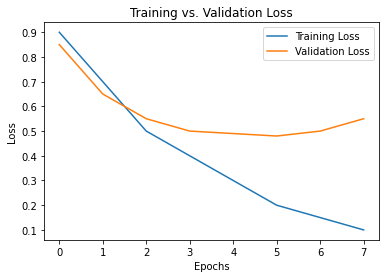

In [36]:
import matplotlib.pyplot as plt

train_losses = [0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.15, 0.1]
val_losses = [0.85, 0.65, 0.55, 0.5, 0.49, 0.48, 0.5, 0.55]

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()

<h2>Summary:</h2>

<ul>
    <li>A language model essentially represents a probability distribution, denoted as \(p(x_1, x_2, \dots, x_m)\).</li>
    <li>\(p(x_1, x_2, \dots, x_m)\) indicates the likelihood of observing a particular sequence of tokens.</li>
    <li>Utilizing the chain rule of probability, we can express \(p(x_1, x_2, \dots, x_m)\) as \(\prod_{i=1}^m p(x_i | x_1:i−1)\). This conditional probability allows us to generate tokens successively based on preceding tokens.</li>
    <li>While we don't possess this exact probability distribution, we can approximate it using deep neural networks.</li>
    <li>Fully connected neural networks aren't ideal for modeling sequences, which is why we initially construct our model using an LSTM layer.</li>
    <li>Although LSTMs and GRUs, which are variants of the vanilla RNN, emerged as solutions for sequence modeling, they possess inherent limitations, especially when dealing with long-distance dependencies. Additionally, RNNs process tokens sequentially and cannot do so in parallel.</li>
    <li>Transformers, on the other hand, excel at maintaining long-distance dependencies and can analyze tokens in parallel, thanks to the attention mechanism they employ at their core.</li>
</ul>
